In [1]:
# Import packages 
import numpy as np               # for numerical operations
import matplotlib.pyplot as plt  # for plotting
import xarray as xr     # for other mathmatical operations

# Sea Ice Concentration Change Over Two Decades  


**Alex Hankins**  
  

OCEAN 215 Final Project  
Autumn 2024

## Introduction

<!-- Include your motivation and any background information needed to understand your research question and data analysis. Clearly state your research question and hypothesis. -->


As the earth continues to increase fossil fuel consumption, global warming is occuring and leaving behind evidence. One of these markers is the coverage of sea ice in arctic regions where there is ice year round. The following data analysis is to see if there is a relationship between change of sea ice concentrations in the Arctic in which global warming continues to have stronger affects on the world. This is done by comparing two decades to see the difference both through graphs and maps. 

If a relationship was found in that sea ice concentrations decrease with global warming, ie. time moving foward and more  decrease in recent years, then this can be a potential indicator on how much our earth is warming. Additionally, it is possible that we could use this data or do similar tests in the future to see if efforts against warming are working. 

The hypostesis for this test is that in the more recent decade (2010-2020) there would be less sea ice concentration in the Arctic along with there being larger rates of change in comparison to (1990-2000) decade as global warming brings extreme weather conditions for all seasons. 


## Data source:
<!-- List each data source used in your project. For each dataset, include: 
     - Where you accessed it from 
     - Date you accessed/downloaded it 
     - Data collection process
     - Relevant variables (including unit) 
     - Spatial and temporal coverage and resolution 
     - Description of any obstacles or challenges you faced in obtaining the dataset
     - URL to the dataset if available -->

- {Dataset}
  - Reynolds, R.W., N.A. Rayner, T.M. Smith, D.C. Stokes, and W. Wang, 2002: An improved in situ and satellite SST analysis for climate. J. Climate, 15, 1609-1625. NOAA Physical Sciences Labrotory on Oct 18, 2024.
  - Data collection process: Satellites over 89.5N - 89.5S, 0.5E - 359.5E. Data recorded daily and on a static update status. 
  - Relevant variables included: 
    - Latitude (˚)
    - Longitude (˚) 
    - Sea Ice Concentration (%)
    - Time (month-day-year) 
    
  - Spatial coverage and resolution: 89.5N - 89.5S, 0.5E - 359.5E,  global, 1-degree grid*
  - Obstacles to data access: All data was collected from this single source but sliced to get the exact time frames that were analyzed. 
  - Temporal coverage and resolution: monthly, (1990-2000) & (2010-2020) 
  - URL to dataset: https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2.html
<br>


## 1. Uploading and Selecting Data

<!-- In this cell, introduction the data set(s) you are working with, specify which aspect of your research question this section addresses, and describe the figure you will produce. -->

Here we are going to take a first look at the data we will be working with and use slice to create variables with the time frames we specifically want to use.

In [2]:
# load data file(s)
data = xr.open_dataset('icec.mnmean.nc')
display(data)

# looking at the data
data['time'].values 

<xarray.Dataset>
Dimensions:    (time: 494, lat: 180, lon: 360, nbnds: 2)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2023-01-01
Dimensions without coordinates: nbnds
Data variables:
    icec       (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:51:42 2005: ncks -d time,0,278 SAVEs/icec.m...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    NCO:            4.0.0
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

array(['1981-12-01T00:00:00.000000000', '1982-01-01T00:00:00.000000000',
       '1982-02-01T00:00:00.000000000', '1982-03-01T00:00:00.000000000',
       '1982-04-01T00:00:00.000000000', '1982-05-01T00:00:00.000000000',
       '1982-06-01T00:00:00.000000000', '1982-07-01T00:00:00.000000000',
       '1982-08-01T00:00:00.000000000', '1982-09-01T00:00:00.000000000',
       '1982-10-01T00:00:00.000000000', '1982-11-01T00:00:00.000000000',
       '1982-12-01T00:00:00.000000000', '1983-01-01T00:00:00.000000000',
       '1983-02-01T00:00:00.000000000', '1983-03-01T00:00:00.000000000',
       '1983-04-01T00:00:00.000000000', '1983-05-01T00:00:00.000000000',
       '1983-06-01T00:00:00.000000000', '1983-07-01T00:00:00.000000000',
       '1983-08-01T00:00:00.000000000', '1983-09-01T00:00:00.000000000',
       '1983-10-01T00:00:00.000000000', '1983-11-01T00:00:00.000000000',
       '1983-12-01T00:00:00.000000000', '1984-01-01T00:00:00.000000000',
       '1984-02-01T00:00:00.000000000', '1984-03-01

In [3]:
# perform data cleaning steps
# make two variables for the data sets (one 1990 - 2000) (two 2010-2020)
ice1 = data['icec'].sel(time = slice('1990-01-01','2000-01-01'))
ice2 = data['icec'].sel(time = slice('2010-01-01','2020-01-01'))

# look at array we just made 
ice2.values

# to get a graph that shows the levels with time, we must average the third dimension 
ice1_mean = ice1.mean(dim = ['lat','lon'])
display(ice1_mean)

<xarray.DataArray 'icec' (time: 121)>
array([16.073923, 15.570407, 16.218628, 16.955748, 17.402018, 17.930641,
       17.044601, 16.682224, 16.439049, 17.955957, 18.714949, 17.335453,
       16.024431, 15.516816, 16.0099  , 17.21858 , 18.025736, 17.997974,
       17.189049, 16.892677, 16.448318, 17.99739 , 18.4891  , 17.391304,
       15.985979, 15.613238, 15.905301, 17.08147 , 17.728851, 18.042692,
       17.540245, 17.150457, 17.083496, 18.68325 , 18.66259 , 17.173002,
       15.716438, 15.308343, 16.067892, 17.23931 , 18.029718, 17.982206,
       17.200415, 16.581493, 16.796907, 18.444801, 18.777157, 17.2398  ,
       16.184484, 15.860467, 16.556362, 17.44734 , 18.227106, 18.311697,
       17.568195, 17.07693 , 17.131311, 18.425192, 19.006638, 17.516024,
       16.304382, 15.689538, 16.27017 , 17.076881, 17.998579, 18.066727,
       17.434717, 16.878937, 16.830236, 17.213877, 18.442776, 17.431177,
       16.01253 , 15.42058 , 15.963038, 17.24688 , 18.407654, 18.730995,
       18.037521, 17.23167 , 17.331633, 18.582146, 18.02364 , 16.926239,
       15.747647, 15.570617, 15.909773, 17.091997, 18.035961, 17.997717,
       17.391489, 16.77343 , 16.694918, 17.676495, 18.457191, 17.413942,
       16.064304, 15.834568, 16.287172, 17.36056 , 18.023779, 18.052217,
       17.362795, 16.669065, 16.568916, 18.207891, 18.540968, 17.283678,
       16.04933 , 15.668087, 16.216276, 17.490126, 18.243876, 18.371227,
       17.558529, 16.81328 , 16.235397, 18.086082, 18.427637, 17.323639,
       15.734834], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2000-01-01

In [4]:
# perform data analysis
# use a rolling mean in order to get an average across the years
new_mean = ice1_mean.rolling( time = 12, center = True).mean()   

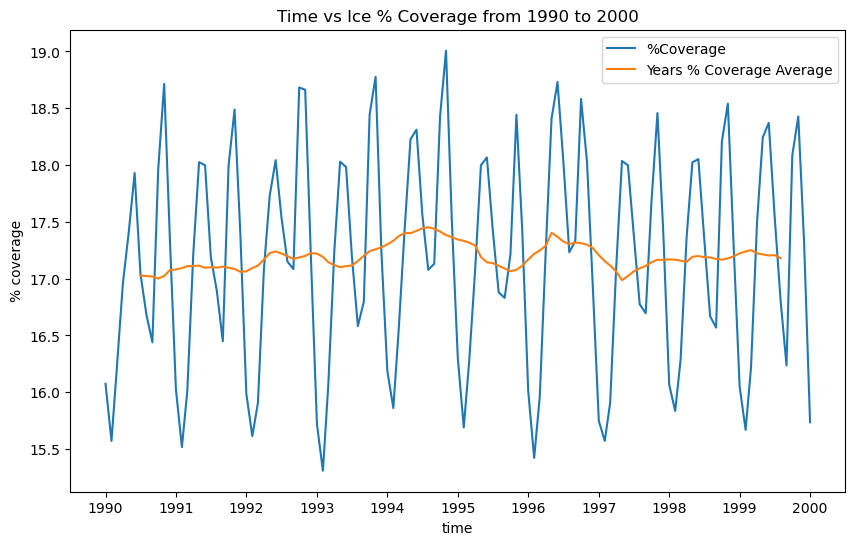

In [5]:
# make and display the first figure
# show the depth over time (we can see its moving up and down becuase of seasons) 
#ice1_mean.plot()

plt.figure(figsize = (10,6)) # making the plot size 
# setting the two different lines with labels
plt.plot(ice1_mean['time'], ice1_mean, label = '%Coverage')
plt.plot(ice1_mean['time'], new_mean, label = 'Years % Coverage Average')

# label the axis 
plt.xlabel('time')
plt.ylabel('% coverage')
plt.title('Time vs Ice % Coverage from 1990 to 2000')
# yellow shows the yearly mean 
plt.legend()   # making a legend to identify the two different lines 

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
Making a chart that will show us the ice coverage from each and every sample time along with the rolling mean to get a clear view of the trend happening by taking the mean of each 12 months (year).

In [6]:
# repeat this for our second decade for comparison (2010-2020) 

ice2_mean = ice2.mean(dim = ['lat','lon']) # averaging the third dimension 
display(ice2_mean) #visualize the data we are working with

# take the rolling mean to make a line showing a more clear trend of sea ice 
new_mean2 = ice2_mean.rolling( time = 12, center = True).mean() 

<xarray.DataArray 'icec' (time: 121)>
array([17.28114  , 16.554523 , 17.143736 , 18.169737 , 19.013268 ,
       19.269829 , 18.408566 , 17.111847 , 16.24405  , 18.138493 ,
       19.370941 , 18.402054 , 16.774796 , 16.328074 , 16.604391 ,
       17.760462 , 18.834196 , 18.981777 , 17.935862 , 16.502123 ,
       16.16258  , 17.78034  , 19.456457 , 18.786304 , 17.593294 ,
       16.699667 , 17.183964 , 18.359407 , 18.991537 , 18.638166 ,
       17.054087 , 15.393081 , 14.564968 , 16.635319 , 18.439562 ,
       17.729162 , 16.47677  , 16.232105 , 17.08272  , 18.019354 ,
       18.62522  , 18.634487 , 17.673853 , 16.7121   , 16.055805 ,
       18.036978 , 19.234365 , 18.484646 , 16.946463 , 16.106514 ,
       16.676126 , 18.252628 , 18.833418 , 18.777863 , 17.914242 ,
       17.013288 , 16.250805 , 17.973598 , 19.399076 , 18.649658 ,
       17.184227 , 16.555279 , 16.9998   , 18.122826 , 18.775373 ,
       18.498878 , 17.52579  , 15.926865 , 15.566901 , 17.430742 ,
       18.662682 , 17.70086  , 15.997222 , 15.362852 , 16.10598  ,
       17.404743 , 17.75086  , 17.654104 , 16.810484 , 15.385386 ,
       14.923754 , 16.09447  , 15.752617 , 15.356186 , 14.83153  ,
       14.876664 , 15.288362 , 16.359608 , 17.132803 , 17.033422 ,
       15.967288 , 14.805084 , 14.567168 , 16.139803 , 17.146248 ,
       16.242582 , 15.244605 , 14.837619 , 15.573279 , 16.55028  ,
       17.146692 , 17.685081 , 17.425877 , 16.276762 , 15.845219 ,
       16.68715  , 18.492655 , 17.265383 , 16.138803 , 15.9431095,
       16.330696 , 17.168982 , 17.804907 , 17.912487 , 16.91651  ,
       15.730261 , 15.669859 , 16.804974 , 18.574745 , 17.85722  ,
       16.4961   ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-01-01

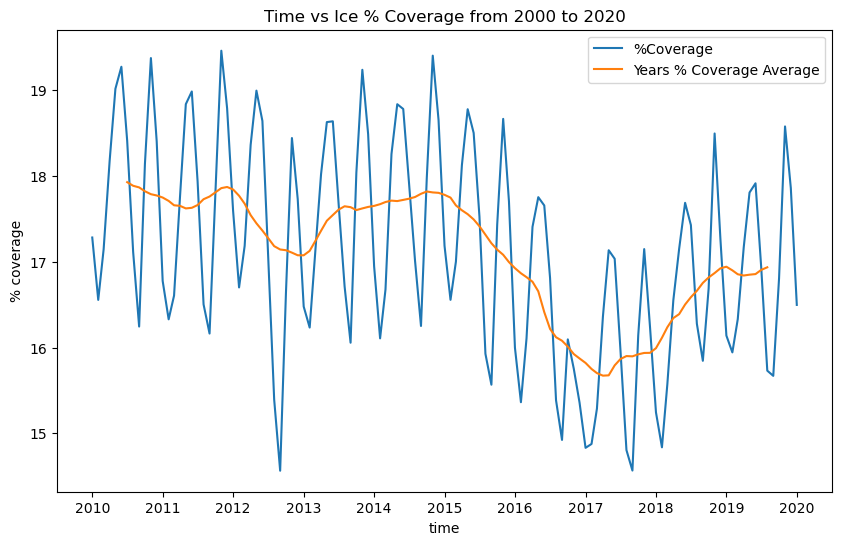

In [7]:
# plotting the data 
# show the % over time (we can see its moving up and down becuase of seasons)

plt.figure(figsize = (10,6))
# making the two different lines to get the origional and the average to be more readable
plt.plot(ice2_mean['time'], ice2_mean, label = '%Coverage')
plt.plot(ice2_mean['time'], new_mean2, label = 'Years % Coverage Average')

# label the axis 
plt.xlabel('time')
plt.ylabel('% coverage')
plt.title('Time vs Ice % Coverage from 2000 to 2020')
# yellow shows the yearly mean 
plt.legend() # legend to identify the two different line meanings 

## 2. Putting them together 

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

Here are are going to use the mean line from the previous graphs and put them together to see them on one chart together. This will help us see the difference in the rate of change for the sea ice. 

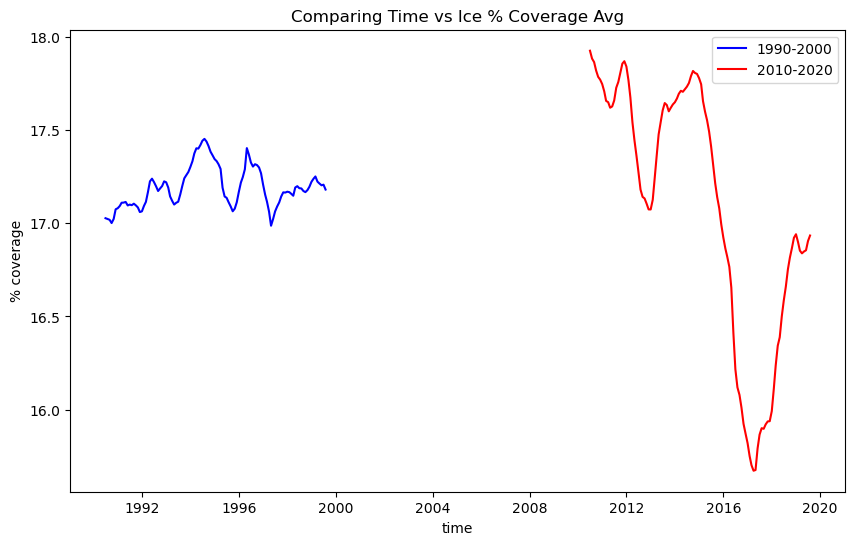

In [8]:
# plotting the figure from two lines used above 

plt.figure(figsize = (10,6))
# making the two different decade lines 
plt.plot(ice1_mean['time'], new_mean, label = '1990-2000', c = 'blue')  # rolling mean from first decade
plt.plot(ice2_mean['time'], new_mean2, label = '2010-2020', c = 'red')  # rolling mean from second decade
# label the axis 
plt.xlabel('time')
plt.ylabel('% coverage')
plt.title('Comparing Time vs Ice % Coverage Avg')
# yellow shows the yearly mean 
plt.legend()  # legend to clearly identify which decade is which 


<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
There is a much larger rate of changes at the 2010-2020. Although we see an increase in the sea ice coverage around 2018, this could be from other weather occurents and the main focus should be on how much more steep the slopes are in this decade compared to 1990-2000. 

## 3. Map View  

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

Looking at line graphs can be great to see trends but because this is satellite data and the ice is on a large scale, it may be useful to get an understanding by creating a map showing the change of sea ice concentrations. To do this, animations were made for the two decades. I had trouble figuring this one out, first trying to use for loops and put a new map plot over one another. This ended up being very complicated and took my computer about 5 min to run the code each time I made a change so the animations ended up being much better. 

In [9]:
# Import packages
import matplotlib.pyplot as plt
import pycmap

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import plotly

In [10]:
# perform data analysis
# make a new mean with the lat and long (previous mean averaged this out) 
ice1_m = ice1.rolling(time = 12).mean('time')   # this keeps the lat and long values over time 
ice1_m

<xarray.DataArray 'icec' (time: 121, lat: 180, lon: 360)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[97.91667 , 98.16667 , 98.16667 , ..., 98.083336, 98.083336,
         98.083336],
        [97.333336, 97.333336, 97.41667 , ..., 97.25    , 97.333336,
         97.333336],
        [96.16667 , 96.083336, 96.16667 , ..., 96.5     , 96.25    ,
         96.25    ],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2000-01-01
Attributes:
    long_name:             Monthly Means of Ice Concentration
    unpacked_valid_range:  [  0. 100.]
    actual_range:          [  0. 122.]
    units:                 %
    precision:             2
    var_desc:              Ice Concentration
    dataset:               NOAA Optimum Interpolation (OI) SST V2
    level_desc:            Surface
    statistic:             Mean
    parent_stat:           Weekly Mean
    cell_methods:          time: mean (monthly from weekly values interpolate...
    valid_range:           [-32765 -22765]

In [11]:
# import packages needed for animations
from matplotlib.animation import FuncAnimation
from IPython.display import Video, HTML

def animate(i):
    fig.clear()  # if there is anything left over on the figure it will get rid of it 
    ax = plt.axes(projection = ccrs.Orthographic(central_longitude = -0.25, 
                                            central_latitude = 70))
    ax.coastlines(resolution = '110m', color = 'black')
    ax.add_feature(cfeature.LAND, color = 'lemonchiffon')
    current = ice1_m.isel(time = i) 
    year = ice1_m.time.dt.year.values[i]
    year = ax.text(0.05, 0.95, f"Year: {year}", transform=ax.transAxes, fontsize=12)    # adds the year counter 
    im = ax.pcolormesh(ice1_m.lon, ice1_m.lat, current, 
                       transform = ccrs.PlateCarree(),  # set the map along with colors
                       cmap = 'Blues', 
                       vmin = 0, vmax = 100)   # vmin and max are for the percentages 
    plt.colorbar(im, shrink = .75, label = '% coverage')
    plt.title('Ice Coverage (%) from 1990-2000')  # set a title for the plot 
     

    
fig = plt.figure(figsize = (10,6))
animation = FuncAnimation(fig, animate, frames = len(ice1_m.time)-1)   
animation.save('ice_animation1.mp4')   # save the animation
plt.close()

In [12]:
Video('ice_animation1.mp4')   #display the animation 

In [13]:
# make a new mean with the lat and long for the second decade
ice2_m = ice2.rolling(time = 12).mean('time')   # this keeps the lat and long values over time 
ice2_m

<xarray.DataArray 'icec' (time: 121, lat: 180, lon: 360)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[99.333336, 99.333336, 99.333336, ..., 99.41667 , 99.41667 ,
         99.333336],
        [98.75    , 98.75    , 99.      , ..., 98.833336, 98.833336,
         99.      ],
        [98.25    , 98.333336, 98.41667 , ..., 98.25    , 98.083336,
         98.16667 ],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-01-01
Attributes:
    long_name:             Monthly Means of Ice Concentration
    unpacked_valid_range:  [  0. 100.]
    actual_range:          [  0. 122.]
    units:                 %
    precision:             2
    var_desc:              Ice Concentration
    dataset:               NOAA Optimum Interpolation (OI) SST V2
    level_desc:            Surface
    statistic:             Mean
    parent_stat:           Weekly Mean
    cell_methods:          time: mean (monthly from weekly values interpolate...
    valid_range:           [-32765 -22765]

In [14]:
# making the animation (same format as the prevoius animation) 
# https://matplotlib.org/stable/users/explain/animations/animations.html for source to learn along with assistance from 
# teaching assistant Ayden 
def animate(i):
    fig.clear()  # if there is anything left over on the figure it will get rid of it 
    ax = plt.axes(projection = ccrs.Orthographic(central_longitude = -0.25, 
                                            central_latitude = 70))
    # making land features 
    ax.coastlines(resolution = '110m', color = 'black')
    ax.add_feature(cfeature.LAND, color = 'lemonchiffon')
    current = ice2_m.isel(time = i) 
    year = ice2_m.time.dt.year.values[i]
    year = ax.text(0.05, 0.95, f"Year: {year}", transform=ax.transAxes, fontsize=12)    # adds the year counter 
    im = ax.pcolormesh(ice1_m.lon, ice2_m.lat, current, 
                       transform = ccrs.PlateCarree(), 
                       cmap = 'Blues', 
                       vmin = 0, vmax = 100)   # vmin and max are for the percentages 
    plt.colorbar(im, shrink = .75, label = '% coverage')  # show the percentage of the ice coverage 
    plt.title('Ice Coverage (%) from 2010-2020')  # set a title for the plot 
     

    
fig = plt.figure(figsize = (10,6))  # creating the figure 
animation = FuncAnimation(fig, animate, frames = len(ice2_m.time)-1)   
animation.save('ice_animation2.mp4')    # save the video 
plt.close()

In [15]:
Video('ice_animation2.mp4')

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 3 : Sea ice coverage (1990-2000) vs (2010-2020) on a map view. By using a map it gives a better visual understanding of where and how the rates are changing. Previously it showed the rate with lat and lon averaged out but these map animations shows the coverage change on each specific degree over the years sampled. 

## Discussion
**Interpretation of Results:**  
<!-- Summarize what you learned from each data analysis section/figure. Discuss key insights and conclusions regarding your research question. Do your results support or contradict your hypothesis? -->
By comparing the average rates on a graph and putting them together, we can see in the more recent decade there is a much greater rate of change occuring. We know that with global warming there are extremes on both ends of the spectrum so this would possibly explain why we see an increase of sea ice coverage during parts of the year, ie the winter months. By using maps to show us a visual representation we can see less % coverage again in the more recent decade and watch as sea ice changes more rapidly. The data supports the hypothesis that sea ice concentrations would be less in the more recent decade observed. 

**Limitations and Future Work:**  
<!-- Identify limitations in your analysis. Discuss any factors that may have impacted the validity or reliability of your results (e.g., data quality, sample size, assumptions). -->
<!-- What next steps could you or another researcher take to continue investigating this research question? Suggest ideas for further research, data collection, or alternative methodologies that could enhance understanding of the topic. -->
 
While satellite images can be quite accurate, they do have errors. One example is that what is actually a white cloud might be mistakenly read as sea ice. Or ice that is actaully land ice (not sea ice) may have been accounted for if boarders were slightly miscalculated in the satellite programing. Satellites are really the best way to measure sea ice concentration as it can get a "birds eye" view. Conditions in the arctic region are difficult for people and machines to be in for long periods of time that would be required to get a large scale survey for both distance covered and time. For further investigation, it would be helpful to study both more recent and old sea ice concentrations along with trying to analyse how the sea ice melting affects ocean circulation. Satellite imaging is continuously improving which means in the future we can expect more accurate data to confirm the conclusions made in that sea ice is decreasing at an exponential rate over time. 

## References  

*Cite all papers, websites, or other resources you referenced in your project. Use a consistent citation style (e.g., APA, MLA, Chicago).*

“Animations Using Matplotlib#.” Animations Using Matplotlib - Matplotlib 3.9.2 Documentation, matplotlib.org/stable/users/explain/animations/animations.html. Accessed 30 Nov. 2024. 

Reynolds, R.W., N.A. Rayner, T.M. Smith, D.C. Stokes, and W. Wang, 2002: An improved in situ and satellite SST analysis for climate. J. Climate, 15, 1609-1625. NOAA Physical Sciences Labrotory on Oct 18, 2024.

Scott, Rebecca Lindsey AND Michon. “Climate Change: Arctic Sea Ice Summer Minimum.” NOAA Climate.Gov, 18 Oct. 2022, www.climate.gov/news-features/understanding-climate/climate-change-arctic-sea-ice-summer-minimum#:~:text=Arctic%20amplification:%20a%20not%2Dso,affect%20the%20global%20climate%20system. 

Help in coding from teaching assistant Ayden on rolling means and creation of animations.  
